In [295]:
import os
import numpy as np
import torch
import torchvision
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [300]:
data_dir = '/home/data/02_SSD4TB/suzy/datasets/public/skincancer-mnist'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [303]:
df_original = pd.read_csv(os.path.join(data_dir, 'HAM10000_metadata.csv'))
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)
df_original['cell_type'] = df_original['dx'].map(lesion_type_dict.get)
df_original['cell_type_idx'] = pd.Categorical(df_original['cell_type']).codes
df_original.head()

df_train = df_original[df_original['train_or_val'] == 'train']
# Copy fewer class to balance the number of 7 classes
data_aug_rate = [15,10,5,50,0,40,5]
for i in range(7):
    if data_aug_rate[i]:
        df_train=df_train.append([df_train.loc[df_train['cell_type_idx'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)
df_train['cell_type'].value_counts()

KeyError: 'train_or_val'

In [282]:
class HAM10000(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load data and get label
        X = Image.open(self.df['path'][index])
        y = torch.tensor(int(self.df['cell_type_idx'][index]))

        if self.transform:
            X = self.transform(X)

        return X, y

In [288]:
def get_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'
# identify train and val rows
# create a new colum that is a copy of the image_id column
df_original['train_or_val'] = df_original['image_id']
# apply the function to this new column
df_original['train_or_val'] = df_original['train_or_val'].apply(get_val_rows)
# filter out train rows
df_train = df_original[df_original['train_or_val'] == 'train']

data_aug_rate = [15,10,5,50,0,40,5]
for i in range(7):
    if data_aug_rate[i]:
        df_train=df_train.append([df_train.loc[df_train['cell_type_idx'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)

df_train['cell_type'].value_counts()
df_train = df_train.reset_index()
df_val = df_val.reset_index()
training_set = HAM10000(df_train, transform=train_transform)

NameError: name 'df_original' is not defined

In [304]:
from zipfile import ZipFile
TRAIN_Name = "/home/data/02_SSD4TB/suzy/datasets/public/intel-mobileodt-cervical-cancer-screening/intel-mobileodt-cervical-cancer-screening.zip"
extract_where = "/home/data/02_SSD4TB/suzy/datasets/public/intel-mobileodt-cervical-cancer-screening/"
with ZipFile(TRAIN_Name, 'r') as zip: 
    # printing all the contents of the zip file       
    # extracting all the files 
    print('Extracting all the train files now...') 
    zip.extractall(extract_where) 
    print('Done!') 

Extracting all the train files now...
Done!


In [305]:
from zipfile import ZipFile
TRAIN_Name = "/home/data/02_SSD4TB/suzy/datasets/public/histopathologic-cancer-detection/histopathologic-cancer-detection.zip"
extract_where = "/home/data/02_SSD4TB/suzy/datasets/public/histopathologic-cancer-detection/"
with ZipFile(TRAIN_Name, 'r') as zip: 
    # printing all the contents of the zip file       
    # extracting all the files 
    print('Extracting all the train files now...') 
    zip.extractall(extract_where) 
    print('Done!') 

Extracting all the train files now...
Done!


In [306]:
from zipfile import ZipFile
TRAIN_Name = "/home/data/02_SSD4TB/suzy/datasets/public/aptos2019-blindness-detection/aptos2019-blindness-detection.zip"
extract_where = "/home/data/02_SSD4TB/suzy/datasets/public/aptos2019-blindness-detection/"
with ZipFile(TRAIN_Name, 'r') as zip: 
    # printing all the contents of the zip file       
    # extracting all the files 
    print('Extracting all the train files now...') 
    zip.extractall(extract_where) 
    print('Done!') 

Extracting all the train files now...
Done!


In [277]:
class HAM10000(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load data and get label
        X = Image.open(self.df['path'][index])
        y = torch.tensor(int(self.df['cell_type_idx'][index]))

        if self.transform:
            X = self.transform(X)

        return X, y

In [278]:
df_train = df_train.reset_index()
df_val = df_val.reset_index()
training_set = HAM10000(df_train, transform=train_transform)

NameError: name 'df_train' is not defined

In [270]:
class ChestXray(ImageFolder):
    def __init__(self, root='/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/', split='train', transform=None):
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
        super(ChestXray, self).__init__(root=os.path.join(root, split), transform=transform)

    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return sample, target

In [271]:
TEST = 'test'
VAL = 'val'
TRAIN = 'train'

chestxray_dataset = {x: ChestXray(split=x) for x in [TRAIN, VAL, TEST]}

dataloaders = {
    TRAIN: torch.utils.data.DataLoader(chestxray_dataset[TRAIN], batch_size = 4, shuffle=True),
    VAL: torch.utils.data.DataLoader(chestxray_dataset[VAL], batch_size = 1, shuffle=True),
    TEST: torch.utils.data.DataLoader(chestxray_dataset[TEST], batch_size = 1, shuffle=True)
}

inputs, classes = next(iter(dataloaders[TRAIN]))

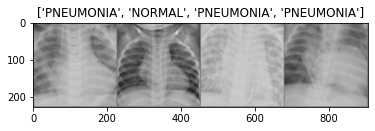

In [272]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
dataset_sizes = {x: len(chestxray_dataset[x]) for x in [TRAIN, VAL]}
classes = chestxray_dataset[TRAIN].classes
class_names = chestxray_dataset[TRAIN].classes

inputs, classes = next(iter(dataloaders[TRAIN]))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [265]:
classes

tensor([1, 0, 1, 1])

In [223]:
classes.shape

torch.Size([4])

In [221]:
inputs.shape

torch.Size([4, 3, 224, 224])

In [207]:
dataset.__getitem__(2)

IndexError: list index out of range

In [ ]:
.__getitem__(2)

In [ ]:
class ChestXray(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir = '/home/data/02_SSD4TB/suzy/datasets/public/chest-xray', train=True, transform=None, download = False):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.train = train
        if self.download = self.download()
        self.root_dir = root_dir
        self.train_list = sorted(os.listdir(os.path.join(root_dir, 'train')))
        self.val_list = sorted(os.listdir(os.path.join(root_dir, 'val')))
        self.test_list = sorted(os.listdir(os.path.join(root_dir, 'test')))
        
        self.data = []
        self.targets = []

        if transform == None:
            self.transform = self.apply_transform()
        else:
            self.transform = transform

    def __len__(self):
        return len(os.listdir(self.images))

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir)
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

    def apply_transform(self, phase='train'):
        if phase == 'train':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'val':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'test':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])        

        return transform
    
    def download(self):
        """Implement this to download into local
        """
        return

In [129]:
torchvision.datasets.ImageFolder('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train').__getitem__(2)

(<PIL.Image.Image image mode=RGB size=1810x1434 at 0x7F19B8C89610>, 0)

In [132]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [133]:
datasets.ImageFolder('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train', transform=transform)

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: /home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [151]:
from torchvision.datasets import ImageFolder

class ChestXray(ImageFolder):
    def __init__(self, root='/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train', transform=None, target_transform=None):
        print(root)

In [152]:
hey = ChestXray()

/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train


In [153]:
hey.classes

AttributeError: 'ChestXray' object has no attribute 'classes'

In [ ]:
class ChestXray(Dataset):
    

In [ ]:
class ChestXray(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir = '/home/data/02_SSD4TB/suzy/datasets/public/chest-xray', train=True, transform=None, download = False):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.train = train
        if self.download = self.download()
        self.root_dir = root_dir
        self.train_list = sorted(os.listdir(os.path.join(root_dir, 'train')))
        self.val_list = sorted(os.listdir(os.path.join(root_dir, 'val')))
        self.test_list = sorted(os.listdir(os.path.join(root_dir, 'test')))
        
        self.data = []
        self.targets = []

        if transform == None:
            self.transform = self.apply_transform()
        else:
            self.transform = transform

    def __len__(self):
        return len(os.listdir(self.images))

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir)
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

    def apply_transform(self, phase='train'):
        if phase == 'train':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'val':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'test':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])        

        return transform
    
    def download(self):
        """Implement this to download into local
        """
        return

In [118]:
my_dataset = datasets.ImageFolder('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train')
my_dataset

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: /home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train

Dataset ImageFolder
    Number of datapoints: 5856
    Root location: /home/data/02_SSD4TB/suzy/datasets/public/chest-xray/

In [56]:
os.listdir('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train')

['PNEUMONIA', 'NORMAL']

In [66]:
my_dataset = datasets.ImageFolder('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/train')

In [115]:
next(iter(my_dataset))[-1]

0

In [54]:
class ChestXray(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir = '/home/data/02_SSD4TB/suzy/datasets/public/chest-xray', train=True, transform=None, download = False):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.train = train
        if self.download = self.download()
        self.root_dir = root_dir
        self.train_list = sorted(os.listdir(os.path.join(root_dir, 'train')))
        self.val_list = sorted(os.listdir(os.path.join(root_dir, 'val')))
        self.test_list = sorted(os.listdir(os.path.join(root_dir, 'test')))
        
        self.data = []
        self.targets = []

        if transform == None:
            self.transform = self.apply_transform()
        else:
            self.transform = transform

    def __len__(self):
        return len(os.listdir(self.images))

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir)
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

    def apply_transform(self, phase='train'):
        if phase == 'train':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'val':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])

        if phase == 'test':
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ])        

        return transform
    
    def download(self):
        """Implement this to download into local
        """
        return

In [ ]:
ChestXray

In [ ]:
class ChestXrayDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [3]:
import zipfile
zip_path = '/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/chest-xray.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/home/data/02_SSD4TB/suzy/datasets/public/chest-xray/extracted')